# Modélisation d'une caténaire

#### Table des matières
1. [Introduction](#1.Introduction) 
2. [Modélisation](#2.Modélisation) 
1. [Code](#subparagraph1) 
3. [Références](#paragraph2) 

---

L'objectif de ce document est de réaliser la modélisation par éléments finis d'un caténaire.

## 1. Introduction

La caténaire constitue le système suivant :
$$ caténaire = \{fil porteur + pendule + fil de contact\} $$

On commence par réaliser une modélisation du fil de contact. On utilise une modèle barre. Le fil est modélisé par une barre de section constant dont on ne peut transmettre que des efforts longitunidaux dans un premier temps.

## 2. Modélisation 

Il est compliqué voir impossible de réaliser un modèle analytique du déplacement d'un cable de caténaire. Il faudrait trouver une équation qui fasse intervenir une fonction $u(x,y,z,t)$ et pouvoir la résoudre.

On réalise une approximation de la forme du fil de contact dans un premier temps par une suite de barre.

![modelisation schema](Images/model.jpg "title")

### 2.1 Etude d'un élément fini

On approxime le déplacement d'un élément par la formule suivante : 

$$ u = N q $$

On utilise les valeurs au extremité de l'élément pour reconstituer le déplacement à l'intérieur de l'élément.

$$ q = \begin{pmatrix} u_1\\ u_2 \end{pmatrix} $$

On doit respecter les conditions limites suivantes sur l'élément : 

$$ \left\{
    \begin{array}\\
        u(0) \implies N_1(0) = 1 \quad \text{et} \quad  N_1(L) = 0 \\
        u(L) \implies N_2(0) = 0 \quad \text{et} \quad N_2(L) = 1 
    \end{array}
\right.
$$

On utilise les polynôme d'interpolation d'ordre 1 suivants :

$$ N_1(x) = 1 - \frac{x}{L} \quad N_2(x) = \frac{x}{L}$$

$$ N = \begin{pmatrix}
N_1 & N_2
\end{pmatrix} $$

On calcule la dérivée par rapport à $x$ :

$$ \frac{\partial N_1}{\partial x}(x) = - \frac{1}{L} \quad \frac{\partial N_2}{\partial x}(x) = \frac{1}{L}$$

On calcule l'énergie de déformation de la barre :

$$ V = \int_{0}^L \rho S \sigma^T \varepsilon dx = \frac{1}{2} u^T E S \int_0^L \frac{\partial N}{\partial x}^T\frac{\partial N}{\partial x} dx u = \frac{1}{2} u^T K u $$

$$ T = \frac{1}{2} \int_0^L \rho S \left( \frac{\partial u}{\partial x} \right)^2 dx = \frac{1}{2} \dot{u}^T \rho S \int_0^L N^TN dx \dot{u} = \frac{1}{2} \dot{u}^T M \dot{u} $$

Equation de Lagrange : 

$$ \frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{q}} \right) -  \frac{\partial \mathcal{L}}{\partial q} $$
avec $q$ la coordonnée généralisée. Ici les coordonnées généralisée sont $u_1$ et $u_2$

On peut calculer la matrice de raideur élémentaire : 
$$ K_{elem} = \frac{ES}{L} \begin{pmatrix}
1 & -1 \\
-1 & 1
\end{pmatrix} $$

> The overriding design goal for Markdown's
> formatting syntax is to make it as readable
> as possible. The idea is that a
> Markdown-formatted document should be
> publishable as-is, as plain text, without
> looking like it's been marked up with tags
> or formatting instructions.

## 1.1 Changement de repère : 

On doit passer du repère local au repère global : 

$$ R(\theta) = \begin{pmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{pmatrix} $$

$$ M_{global} = R(\theta)^T M_{elem} R(\theta) $$

Dans notre exemple, on considère un fil de contact avec 2 éléments :

Ensuite on doit changer de système de coordonnées, des coordonnées local à global : 

<span style="color:red"> **Calcul des matrices de passage à revoir !!!** </span>

$$ B_{element_1} = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
0 & 0
\end{pmatrix}$$

$$ B_{element_2} = \begin{pmatrix}
0 & 0 \\
1 & 0 \\
0 & 1
\end{pmatrix}$$

$$ \begin{pmatrix}
u_1  \\
u_2  \\
u_3
\end{pmatrix}_G = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
0 & 0
\end{pmatrix} \begin{pmatrix}
u_1  \\
u_2  \\
\end{pmatrix}_E $$

$$ M_{global} = B^{-1} M_{elem} B $$

Enfin, on vient assembler les matrices de raideurs : 

$$ K = \sum_i K_i $$

On résoud finalement l'équation matricielle suivante : 

$$ F = KU $$

### Codage du modéle

On va maintenant coder tout ça en python et automatiser un peut les calculs pour plus d'éléments. 
Et faire de la visualisation pour vérifier un peu ce qu'on fait.

On commence par importer les package nécessaires : 
- *numpy* pour la création et manipulation de matrice
- *matplotlib* pour le tracer de graphe

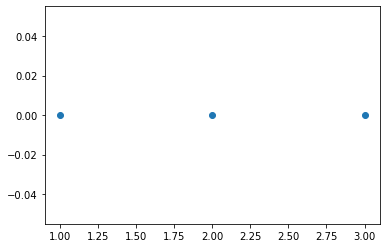

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

NL = np.array([[1,0],
              [2,0],
              [3,0]])

EL = np.array([[1,2],
              [2,3]])

plt.plot(NL[:,0],NL[:,1],'o')
plt.show()

In [9]:
E = 200e9 # Module D'Young [en Pa]
S = 100e-6 # Section [en m^2]
L = 1 # Longueur d'un element [en m]

K_elem = E*S/L*np.array([[1, -1],
                        [-1, 1]])

### a travailler pour prendre en compte angle et forme cyclique !!!
def calcul_angle_element(NL,EL) : 
    angles = []
    for i in range(len(EL)) : 
        print("traitement de l'element ", i + 1, ":")
        noeud1 = EL[i,0]
        noeud2 = EL[i,1]
        x_1, x_2, y_1, y_2 = NL[noeud1-1,0],NL[noeud2-1,0],NL[noeud1-1,1],NL[noeud2-1,1]
        L = np.sqrt((x_2-x_1)**2 + (y_2-y_1)**2)
        print(x_1, x_2, y_1, y_2,L)
        angle = np.arccos(np.abs(x_2-x_1)/L)
        print('angle = ', angle)
    return
### a travailler !!!
        
def R(theta) : 
    Rotation_matrix = np.array([[np.cos(theta), np.sin(theta)],
                               [-np.sin(theta), np.cos(theta)]])
    return Rotation_matrix

def changement_base(P,M) : 
    return P.dot(M).dot(np.transpose(P))

def changement_coord(NL,EL) :
    BB = []
    for i in range(len(EL)) : 
        print("generation de la matrice de passage de l'element ", i + 1, ":")
        B = np.zeros([len(NL),2])
        noeud1 = EL[i,0]
        noeud2 = EL[i,1]
        B[noeud1 - 1, 0] = 1
        B[noeud2 - 1, 1] = 1
        print(B)
        BB.append(B)
    return BB

NoN = len(NL) # Nombre de noeuds
NoE = len(EL) # Nombre d'elements
print("Nombre de noeuds :", NoN)
print("Nombre de elements :", NoE)

F = np.zeros([NoN,2])
D = np.zeros([NoN,2])

print("Vecreur force :\n", F, np.transpose(F.flatten()) )
print("Vecreur deplacement :\n", D )

B_1 = np.array([[1,0],
               [0,1],
               [0,0]])

B_2 = np.array([[0,0],
               [1,0],
               [0,1]])

print("resultat changement de base : \n", B_1.dot(K_elem).dot(np.transpose(B_1)))

K_rot = changement_base(R(0),K_elem)
print(K_rot)
K_glob = changement_base(B_1,K_rot)
print(K_glob)

def assemblage(M_elem,NL,EL) :
    print("Debut de l'assemblage")
    print("Fin de l'assemblage")
    return M_assemblee

matrices_de_passage = changement_coord(NL,EL)
calcul_angle_element(NL,EL)



Nombre de noeuds : 3
Nombre de elements : 2
Vecreur force :
 [[0. 0.]
 [0. 0.]
 [0. 0.]] [0. 0. 0. 0. 0. 0.]
Vecreur deplacement :
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
resultat changement de base : 
 [[ 20000000. -20000000.         0.]
 [-20000000.  20000000.         0.]
 [        0.         0.         0.]]
[[ 20000000. -20000000.]
 [-20000000.  20000000.]]
[[ 20000000. -20000000.         0.]
 [-20000000.  20000000.         0.]
 [        0.         0.         0.]]
generation de la matrice de passage de l'element  1 :
[[1. 0.]
 [0. 1.]
 [0. 0.]]
generation de la matrice de passage de l'element  2 :
[[0. 0.]
 [1. 0.]
 [0. 1.]]
traitement de l'element  1 :
1 2 0 0 1.0
angle =  0.0
traitement de l'element  2 :
2 3 0 0 1.0
angle =  0.0


| Plugin | README |
| ------ | ------ |
| Dropbox | [plugins/dropbox/README.md][PlDb] |
| GitHub | [plugins/github/README.md][PlGh] |
| Google Drive | [plugins/googledrive/README.md][PlGd] |
| OneDrive | [plugins/onedrive/README.md][PlOd] |
| Medium | [plugins/medium/README.md][PlMe] |
| Google Analytics | [plugins/googleanalytics/README.md][PlGa] |

### paramètres du modèle

$\sigma = \frac{T}{S}$

In [4]:
T = 12000 # Tension appliquee au fil [en N]
S_fc = 150e-6 # Section du fil de contact [en m^2]

sigma_fc = T/S_fc # Contrainte dans le fil de contact [en N/m^2]
print("contrainte dans le fil :", sigma_fc/1e6, " MPa")

contrainte dans le fil : 80.0  MPa


## Liens utiles :

* [1]: <https://fr.wikipedia.org/wiki/Cat%C3%A9naire> "Définition caténaire"